In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv("p6_customer_shopping_data.csv")

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [84]:

df = pd.read_csv("p6_customer_shopping_data.csv") 
display("Data Preview:", df.head())
display("\nData Tail:", df.tail())

display(df.groupby("shopping_mall").count())
display(df.groupby("category").count())


'Data Preview:'

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


'\nData Tail:'

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date
shopping_mall,,,,,,,,,
Cevahir AVM,4991,4991,4991,4991,4991,4991,4991,4991,4991
Emaar Square Mall,4811,4811,4811,4811,4811,4811,4811,4811,4811
Forum Istanbul,4947,4947,4947,4947,4947,4947,4947,4947,4947
Istinye Park,9781,9781,9781,9781,9781,9781,9781,9781,9781
Kanyon,19823,19823,19823,19823,19823,19823,19823,19823,19823
Mall of Istanbul,19943,19943,19943,19943,19943,19943,19943,19943,19943
Metrocity,15011,15011,15011,15011,15011,15011,15011,15011,15011
Metropol AVM,10161,10161,10161,10161,10161,10161,10161,10161,10161
Viaport Outlet,4914,4914,4914,4914,4914,4914,4914,4914,4914


,invoice_no,customer_id,gender,age,quantity,price,payment_method,invoice_date,shopping_mall
category,,,,,,,,,
Books,4981,4981,4981,4981,4981,4981,4981,4981,4981
Clothing,34487,34487,34487,34487,34487,34487,34487,34487,34487
Cosmetics,15097,15097,15097,15097,15097,15097,15097,15097,15097
Food & Beverage,14776,14776,14776,14776,14776,14776,14776,14776,14776
Shoes,10034,10034,10034,10034,10034,10034,10034,10034,10034
Souvenir,4999,4999,4999,4999,4999,4999,4999,4999,4999
Technology,4996,4996,4996,4996,4996,4996,4996,4996,4996
Toys,10087,10087,10087,10087,10087,10087,10087,10087,10087


In [85]:
def sales_stat(df):
    branch_sales = df.groupby("shopping_mall")["price"].sum()
    category_sales = df.groupby("category")["price"].sum()
    combined_sales = df.groupby(["shopping_mall", "category"])["price"].sum()
    print("\nTotal Sales by Branch:\n", branch_sales)
    print("\nTotal Sales by Category:\n", category_sales)
    print("\nTotal Sales:\n",combined_sales)
    return branch_sales, category_sales, combined_sales

def plot_pie(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

def plot_groupbar(df):
    combined_pivot = df.pivot_table(index="shopping_mall", columns="category", values="price", aggfunc="sum")
    combined_pivot.plot(kind="bar")
    plt.title("Sales by Category across Branches")
    plt.xlabel("Shopping Mall Branch")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.legend(title="Product Category")
    plt.show()


Total Sales by Branch:
 shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64

Total Sales by Category:
 category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Souvenir             174436.83
Technology         15772050.00
Toys                1086704.64
Name: price, dtype: float64

Total Sales:
 shopping_mall  category       
Cevahir AVM    Books                11998.80
               Clothing           1554414.40
               Cosmetics            88394.84
               Food & Beverage      11992.39
               Shoes               884050.41
                    

shopping_mall
Forum Istanbul        3336073.82
Emaar Square Mall     3390408.31
Viaport Outlet        3414019.46
Cevahir AVM           3433671.84
Zorlu Center          3509649.02
Istinye Park          6717077.54
Metropol AVM          6937992.99
Metrocity            10249980.07
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Name: price, dtype: float64

category
Souvenir             174436.83
Books                226977.30
Food & Beverage      231568.71
Toys                1086704.64
Cosmetics           1848606.90
Technology         15772050.00
Shoes              18135336.89
Clothing           31075684.64
Name: price, dtype: float64

shopping_mall      category
Viaport Outlet     Souvenir       7636.23
Cevahir AVM        Souvenir       8304.84
Zorlu Center       Souvenir       8398.68
Emaar Square Mall  Souvenir       8515.98
Forum Istanbul     Souvenir       9090.75
                                  ...    
Kanyon             Shoes       3640031.05
Mall of Istanbul   Shoes       3668239.04
Metrocity          Clothing    4719958.32
Kanyon             Clothing    6155541.04
Mall of Istanbul   Clothing    6245565.04
Name: price, Length: 80, dtype: float64

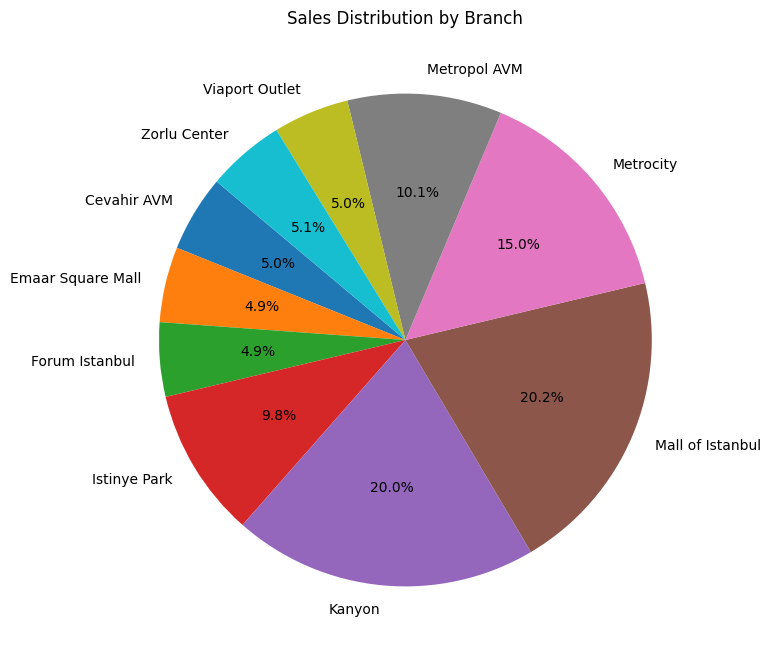

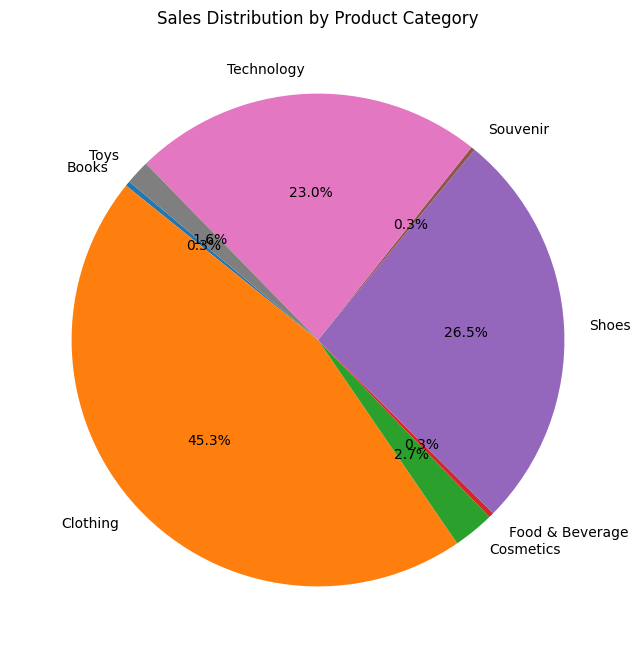

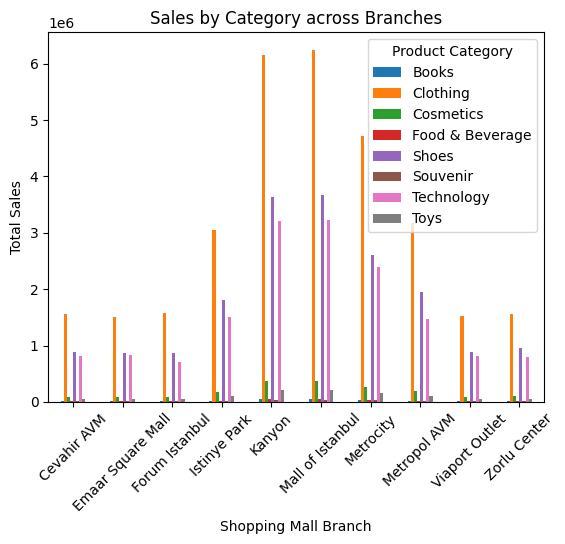

In [86]:
branch_sales, category_sales, combined_sales = sales_stat(df)

display(branch_sales.sort_values())
display(category_sales.sort_values())
display(combined_sales.sort_values())

plot_pie(branch_sales, "Sales Distribution by Branch")
plot_pie(category_sales, "Sales Distribution by Product Category")

plot_groupbar(df)